In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from tensorflow.python.keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

In [50]:
import pandas as pd
df = pd.read_csv('Cryptocurrency-Datasets/ETH-USD.csv')

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-22,229.003372,243.776016,228.934738,242.533188,242.533188,9.079587e+09
1,2020-06-23,242.537018,244.864410,239.759735,244.142151,244.142151,6.624530e+09
2,2020-06-24,244.185928,248.508026,232.807739,235.772461,235.772461,8.815030e+09
3,2020-06-25,235.702850,236.053406,230.296600,232.944489,232.944489,7.010426e+09
4,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09
...,...,...,...,...,...,...,...
361,2021-06-18,2374.586914,2377.195068,2147.308350,2231.733154,2231.733154,2.275282e+10
362,2021-06-19,2235.159180,2278.415039,2168.885010,2178.499023,2178.499023,1.876585e+10
363,2021-06-20,2171.337891,2275.382813,2049.962646,2246.364502,2246.364502,2.253593e+10
364,2021-06-21,2245.317871,2259.464111,1867.185425,1888.447510,1888.447510,3.374517e+10


In [17]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-22,229.003372,243.776016,228.934738,242.533188,242.533188,9.079587e+09
1,2020-06-23,242.537018,244.864410,239.759735,244.142151,244.142151,6.624530e+09
2,2020-06-24,244.185928,248.508026,232.807739,235.772461,235.772461,8.815030e+09
3,2020-06-25,235.702850,236.053406,230.296600,232.944489,232.944489,7.010426e+09
4,2020-06-26,232.877487,233.901932,229.259460,229.668045,229.668045,7.187490e+09
5,2020-06-27,229.631485,232.493423,220.564575,222.959793,222.959793,6.918381e+09
6,2020-06-28,222.914490,228.598282,219.472672,225.347168,225.347168,6.205926e+09
7,2020-06-29,225.361435,229.903214,222.254990,228.194870,228.194870,6.726165e+09
8,2020-06-30,227.968430,229.476807,224.815186,226.315002,226.315002,6.094093e+09
9,2020-07-01,226.134583,232.756119,224.835739,231.113419,231.113419,6.463737e+09


In [18]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
356,2021-06-13,2372.690186,2547.367920,2312.640137,2508.391602,2508.391602,2.709295e+10
357,2021-06-14,2508.770508,2606.432861,2469.388184,2537.891113,2537.891113,2.696458e+10
358,2021-06-15,2587.762695,2639.229248,2515.153076,2610.936768,2610.936768,2.900528e+10
359,2021-06-16,2544.864746,2554.628906,2354.350586,2367.663574,2367.663574,2.410193e+10
360,2021-06-17,2367.306396,2457.175537,2312.301514,2372.001953,2372.001953,2.187163e+10
361,2021-06-18,2374.586914,2377.195068,2147.308350,2231.733154,2231.733154,2.275282e+10
362,2021-06-19,2235.159180,2278.415039,2168.885010,2178.499023,2178.499023,1.876585e+10
363,2021-06-20,2171.337891,2275.382813,2049.962646,2246.364502,2246.364502,2.253593e+10
364,2021-06-21,2245.317871,2259.464111,1867.185425,1888.447510,1888.447510,3.374517e+10
365,2021-06-22,1879.109619,1989.134399,1718.023071,1718.023071,1718.023071,3.172271e+10


In [23]:
df = df[['Date', 'Adj Close']]
df.head(10)

,Date,Adj Close
0,2020-06-22,242.533188
1,2020-06-23,244.142151
2,2020-06-24,235.772461
3,2020-06-25,232.944489
4,2020-06-26,229.668045
5,2020-06-27,222.959793
6,2020-06-28,225.347168
7,2020-06-29,228.194870
8,2020-06-30,226.315002
9,2020-07-01,231.113419


In [22]:
df.tail(10)

,Date,Adj Close
356,2021-06-13,2508.391602
357,2021-06-14,2537.891113
358,2021-06-15,2610.936768
359,2021-06-16,2367.663574
360,2021-06-17,2372.001953
361,2021-06-18,2231.733154
362,2021-06-19,2178.499023
363,2021-06-20,2246.364502
364,2021-06-21,1888.447510
365,2021-06-22,1718.023071


In [26]:
df.index = df['Date']

Ethereum Values from 6/22/2020 - 6/22/2021


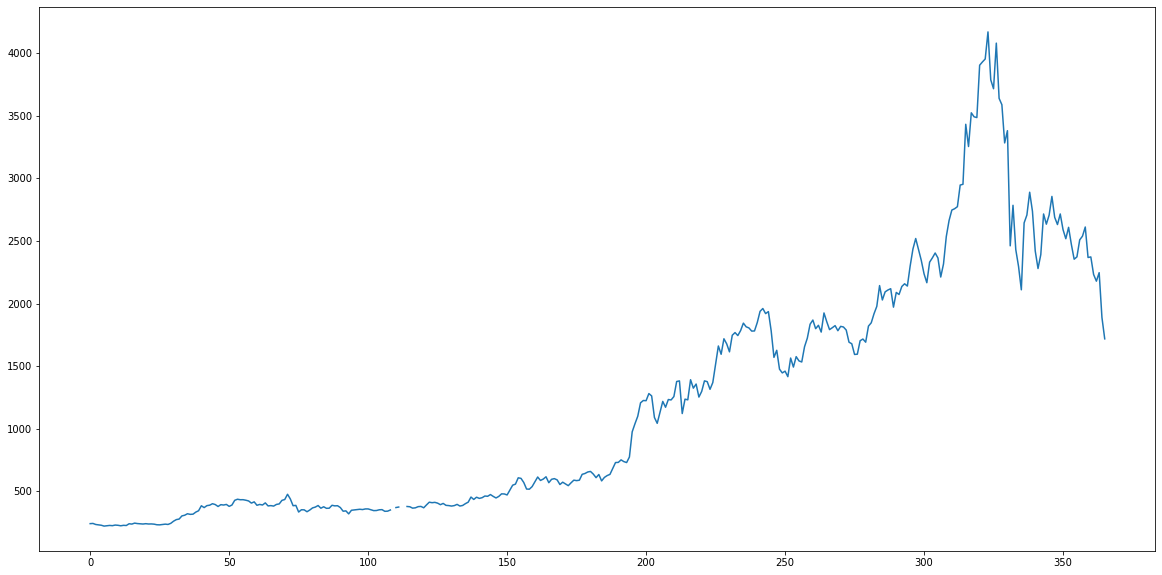

In [70]:
print('Ethereum Values from 6/22/2020 - 6/22/2021')
plt.plot(df["Adj Close"],label='Close Price history')

In [31]:
df = df.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Adj Close'])
for i in range(0,len(data)):
    data["Date"][i]=df['Date'][i]
    data["Adj Close"][i]=df["Adj Close"][i]
data.head(10)

,Date,Adj Close
0,2020-06-22,242.533188
1,2020-06-23,244.142151
2,2020-06-24,235.772461
3,2020-06-25,232.944489
4,2020-06-26,229.668045
5,2020-06-27,222.959793
6,2020-06-28,225.347168
7,2020-06-29,228.19487
8,2020-06-30,226.315002
9,2020-07-01,231.113419


In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop("Date",axis=1,inplace=True)
final_data = data.values
train_data=final_data[0:200,:]
valid_data=final_data[200:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [56]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)